Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

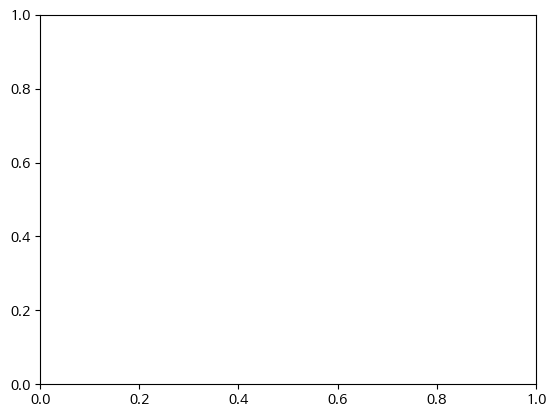

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.5f}'.format  #결과에 지수를 실수로 보이게끔


# matplotlib에서 한글 깨짐 문제 발생
# 한글 폰트 사용을 위해서 폰트 설치
# 참고 - https://www.whatwant.com/entry/matplotlib-hangul-colab-local
# 실행 후 런타임 다시 시작해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#설치한 폰트 사용
plt.rc('font', family='NanumBarunGothic')

In [109]:
#2013-01 ~ 2023-08-15 까지의 데이터
data = pd.read_excel('세대별대출분석.xlsx')

#2023-08은 아직 한달이 다 안지났으니 분석에서 제외
data = data[data['월'] != '2023-08']

data = data.sort_values('월', ascending=False).reset_index(drop=True)
data['연도월'] = pd.to_datetime(data['월'])
data['연'] = data['연도월'].dt.year
data['월'] = data['연도월'].dt.month
data['합계'] = data.iloc[:,3:].sum(axis=1)

tmp = ['연도월', '연', '월', '합계', '영유아(0~5)',	'유아(6~7)', '초등(8~13)', '청소년(14~19)', '20대', '30대', '40대', '50대', '60대 이상']
data = data[tmp]
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-109-23201d01395b>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['합계'] = data.iloc[:,3:].sum(axis=1)


,연도월,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
0,2023-07-01,2023,7,9405031,295324,542519,1837488,390891,431900,1682029,3628659,852167,579874
1,2023-06-01,2023,6,7967816,265457,458918,1501420,251124,382654,1467065,3091590,758017,513923
2,2023-05-01,2023,5,7835440,247316,432065,1443020,307489,362670,1404430,3019349,777655,518804
3,2023-04-01,2023,4,8642808,263716,480490,1700830,269481,378606,1540072,3386769,824670,540357
4,2023-03-01,2023,3,8920657,259816,475894,1734277,305337,397790,1582615,3481264,842884,574467


In [5]:
data.shape

(127, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   연도월         127 non-null    datetime64[ns]
 1   연           127 non-null    int64         
 2   월           127 non-null    int64         
 3   합계          127 non-null    int64         
 4   영유아(0~5)    127 non-null    int64         
 5   유아(6~7)     127 non-null    int64         
 6   초등(8~13)    127 non-null    int64         
 7   청소년(14~19)  127 non-null    int64         
 8   20대         127 non-null    int64         
 9   30대         127 non-null    int64         
 10  40대         127 non-null    int64         
 11  50대         127 non-null    int64         
 12  60대 이상      127 non-null    int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 13.0 KB


In [7]:
data.describe()

,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
count,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000
mean,2017.80315,6.36220,7582344.61417,305808.82677,444018.40157,1442924.30709,423590.60630,492600.50394,1690361.40945,2579929.46457,579094.06299,371826.45669
std,3.07328,3.44957,1471494.71329,68110.99996,93488.47218,334636.13114,149244.03879,116682.67709,309401.66236,630154.29018,145230.24055,111631.70911
min,2013.00000,1.00000,1026365.00000,23911.00000,39606.00000,184596.00000,58496.00000,61230.00000,201352.00000,395885.00000,81178.00000,41608.00000
25%,2015.00000,3.00000,6766149.00000,269310.00000,406384.00000,1228976.50000,330158.50000,403639.00000,1570573.00000,2184138.50000,480155.50000,285692.50000
50%,2018.00000,6.00000,7819020.00000,313696.00000,441345.00000,1394626.00000,395258.00000,514945.00000,1700550.00000,2587969.00000,589290.00000,379557.00000
75%,2020.00000,9.00000,8422832.00000,352720.00000,494287.00000,1696098.00000,509646.50000,579569.50000,1861523.00000,3054008.00000,684562.50000,461098.50000
max,2023.00000,12.00000,10422604.00000,451535.00000,660816.00000,2197574.00000,840170.00000,704374.00000,2309395.00000,3787137.00000,868545.00000,592792.00000


### 시각화

Text(0.5, 1.0, '월별 대출건수 변화')

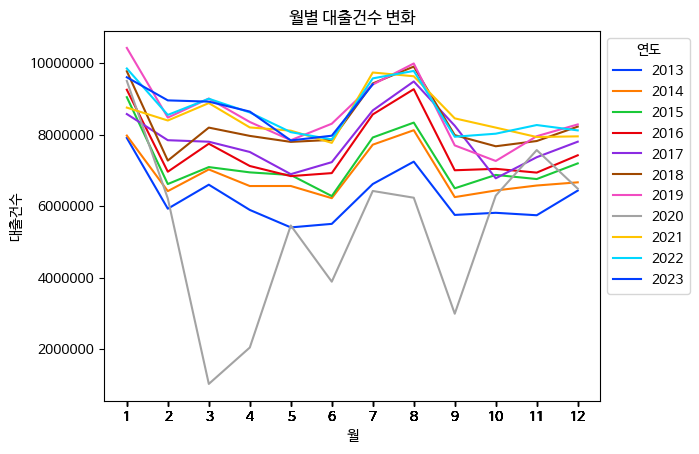

In [73]:
sns.lineplot(data=data, x='월', y = '합계', hue='연', palette='bright')
plt.xticks(data['월'])
plt.ylabel('대출건수')

plt.legend(bbox_to_anchor = (1,1), title="연도") #범례 밖에 표시되게 설정
#y축의 값에 지수를 실수로 보이게끔
plt.ticklabel_format(style='plain', axis='y')

plt.title('월별 대출건수 변화')

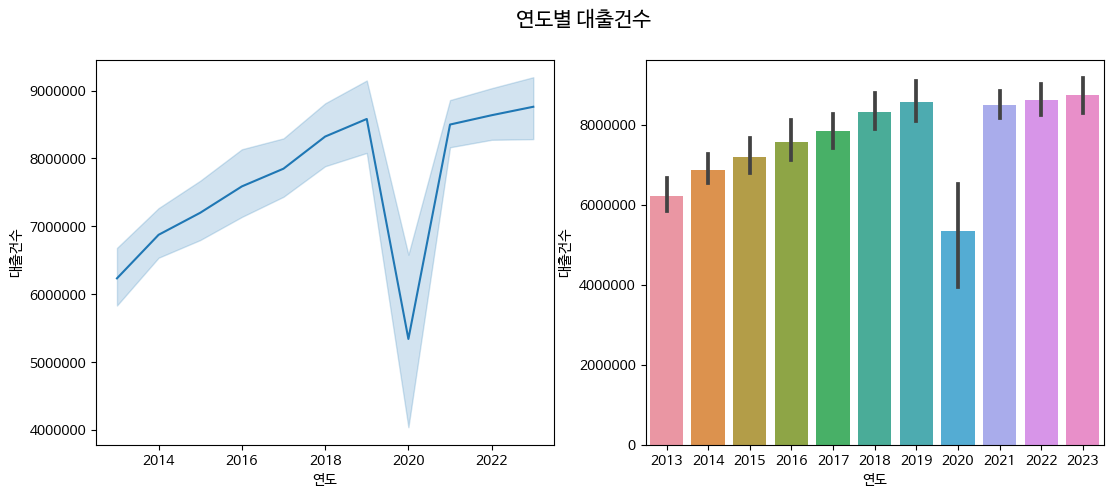

In [44]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(13, 5)

sns.lineplot(data=data, x='연', y = '합계', ax=ax[0])
sns.barplot(data=data, x='연', y = '합계', ax=ax[1])

ax[0].set_xlabel('연도')
ax[1].set_xlabel('연도')
ax[0].set_ylabel('대출건수')
ax[1].set_ylabel('대출건수')

#y축의 값에 지수를 실수로 보이게끔
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle('연도별 대출건수', fontsize = 15)

plt.show()

In [110]:
# 시각화 하기 위해 데이터 만드는중

tmp = data.groupby('연').mean().iloc[:,1:]
tmp = tmp.reset_index()
tmp.head(3)

<ipython-input-110-bce5ee5ce209>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby('연').mean().iloc[:,1:]


In [113]:
tmp.columns[1:]

Index(['합계', '영유아(0~5)', '유아(6~7)', '초등(8~13)', '청소년(14~19)', '20대', '30대',
       '40대', '50대', '60대 이상'],
      dtype='object')

In [117]:
data1 = pd.melt(tmp, id_vars=['연'], value_vars=tmp.columns[1:])

In [118]:
data1.head()

,연,variable,value
0,2013,합계,6235467.91667
1,2014,합계,6876598.25000
2,2015,합계,7200861.25000
3,2016,합계,7589007.66667
4,2017,합계,7849843.66667


In [140]:
print(len(data1))
not_sum_data1 = data1[data1['variable'] != '합계']

110


<Axes: xlabel='연', ylabel='value'>

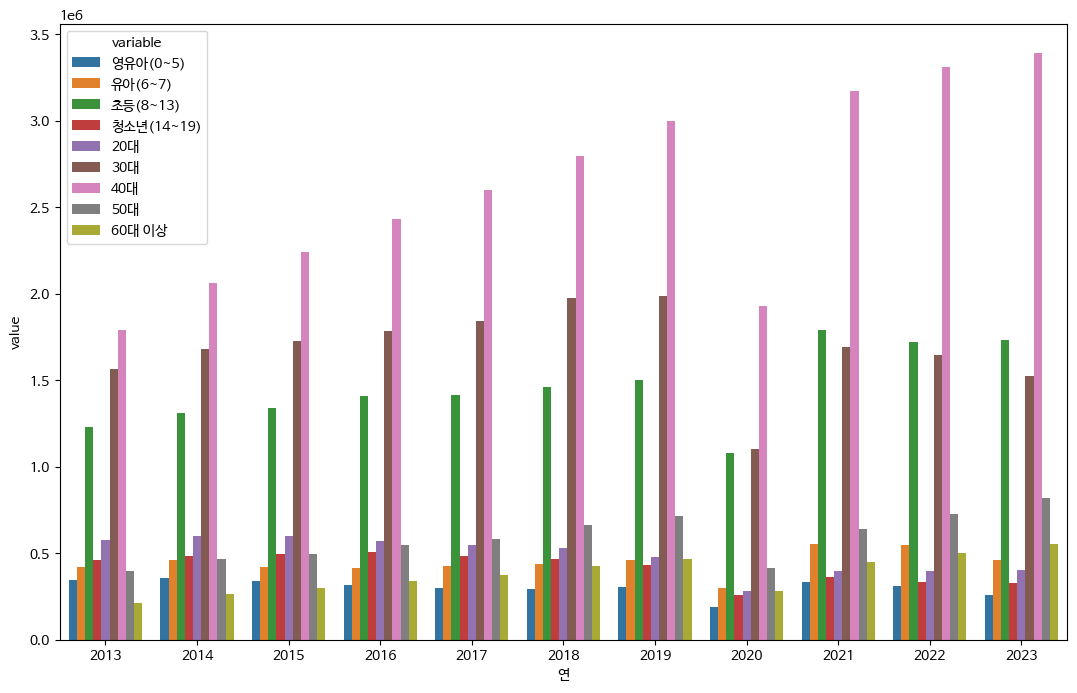

In [125]:
plt.figure(figsize=(13,8))

sns.barplot(data=not_sum_data1, x='연', y = 'value', hue='variable')

In [133]:
data

,연도월,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
0,2023-07-01,2023,7,9405031,295324,542519,1837488,390891,431900,1682029,3628659,852167,579874
1,2023-06-01,2023,6,7967816,265457,458918,1501420,251124,382654,1467065,3091590,758017,513923
2,2023-05-01,2023,5,7835440,247316,432065,1443020,307489,362670,1404430,3019349,777655,518804
3,2023-04-01,2023,4,8642808,263716,480490,1700830,269481,378606,1540072,3386769,824670,540357
4,2023-03-01,2023,3,8920657,259816,475894,1734277,305337,397790,1582615,3481264,842884,574467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2013-05-01,2013,5,5403353,289157,358086,994972,360298,496881,1402621,1589619,363065,193884
123,2013-04-01,2013,4,5892007,325880,415621,1138084,311233,532388,1571194,1738171,390536,208388
124,2013-03-01,2013,3,6597794,327166,428211,1349098,430425,552441,1650861,1965168,424935,222853
125,2013-02-01,2013,2,5926539,255645,335425,1225038,530587,541512,1344531,1690606,387854,204398


In [134]:
data3 = pd.melt(data, id_vars=['연','월'], value_vars=data.columns[3:])

In [136]:
data3.columns

Index(['연', '월', 'variable', 'value'], dtype='object')

In [139]:
not_sum_data3 = data3[data3['variable'] != '합계']

In [181]:
tmp = data1[data1['variable']!='합계']
age_mean_data1 = tmp.groupby('variable').mean()
age_mean_data1 = age_mean_data1.reset_index()

In [182]:
age_mean_data1

,variable,연,value
0,20대,2018.00000,489145.03571
1,30대,2018.00000,1684146.36688
2,40대,2018.00000,2610628.00758
3,50대,2018.00000,588273.29762
4,60대 이상,2018.00000,378780.40043
5,영유아(0~5),2018.00000,303993.69264
6,유아(6~7),2018.00000,444744.66342
7,청소년(14~19),2018.00000,420069.16017
8,초등(8~13),2018.00000,1453944.27381


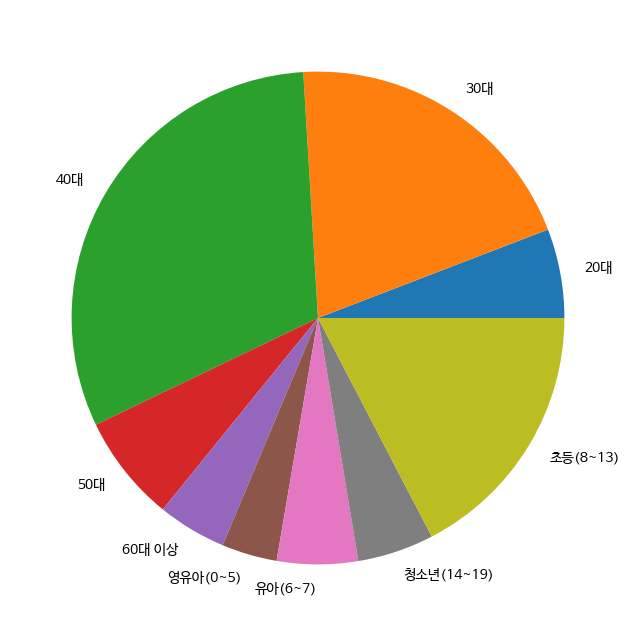

In [185]:
plt.figure(figsize=(13,8))

#rocket_r, Set2
# , palette='Spectral'
plt.pie(data=age_mean_data1, x='value', labels = 'variable')
plt.show()

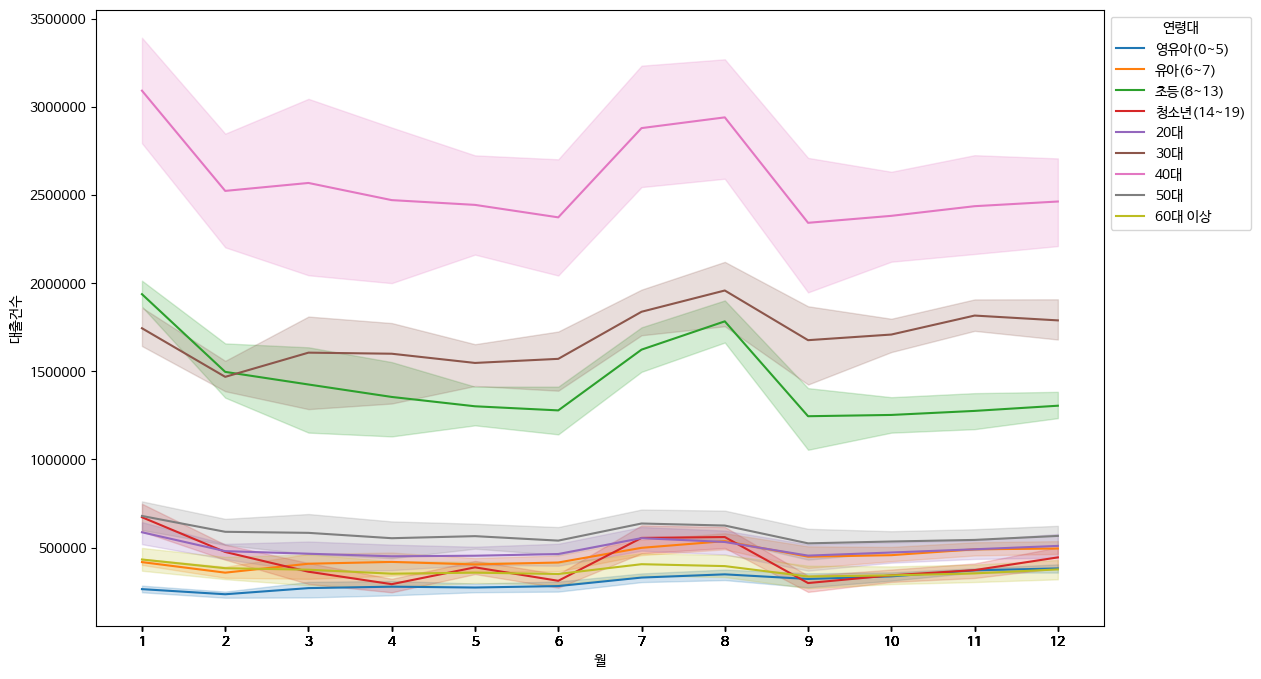

In [157]:
plt.figure(figsize=(13,8))

#rocket_r, Set2
# , palette='Spectral'
sns.lineplot(data=not_sum_data3, x='월', y = 'value', hue='variable')
plt.xticks(data['월'])
plt.ylabel('대출건수')


plt.legend(bbox_to_anchor = (1,1), title="연령대") #범례 밖에 표시되게 설정
#y축의 값에 지수를 실수로 보이게끔
plt.ticklabel_format(style='plain', axis='y')

